In [16]:
# Importing Required modules:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')
from sklearn.pipeline import make_pipeline
# Clustering
from sklearn.cluster import KMeans
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
# Dendogram
from scipy.cluster.hierarchy import linkage, dendrogram
# Dimeanionality Reduction - PCA
from sklearn.decomposition import PCA


In [82]:
df = pd.read_csv("company-stock-movements-2010-2015-incl.csv")
print(df.shape)
df.head()

(60, 964)


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


#### Data consists of Stock price movements of 60 companies from 2010 to 2015. Each row represent a company where as each column is a date in 2010-2015. Each entry in the date column is that company's stocks daily movement from the open and close values.

In [83]:
movements = df.iloc[:,1:]
companies = df.iloc[:,0]

### Observing the company stock Movements:

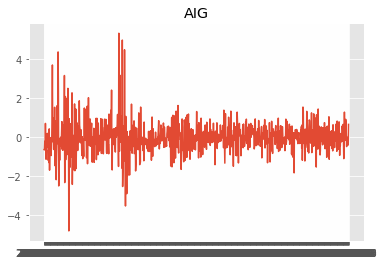

In [72]:
plt.plot(movements.iloc[1,:])
plt.title(companies[1])
plt.show()

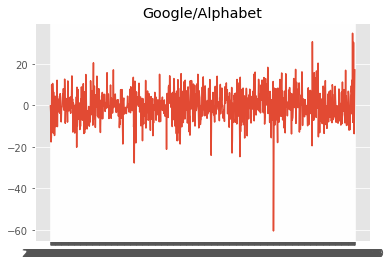

In [79]:
plt.plot(movements.iloc[17,:])
plt.title(companies[17])
plt.show()

What we can see from these two stocks is that we have different scales between the price movements.

This means we need to do a normalization step before we apply k-means clustering. If we don't do this the algorithm would just cluster based on the price of the stock.

In [81]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
# we are using normalize for scaling instead of standard scaler because we need to scale row-wise for each company 
normalized_movements = pd.DataFrame(normalize(movements),columns=movements.columns)

###  Finding the apt number of clusters ie Ideal value of k:

#### Method -1 : Using Elbow plot and cluster errors:

In [84]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 21)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 15,random_state=1)
  clusters.fit(normalized_movements)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,35.665009
1,2,33.370325
2,3,32.155351
3,4,30.857256
4,5,30.430739
5,6,28.809786
6,7,28.233973
7,8,27.320021
8,9,26.102757
9,10,25.491769


In [85]:
errors = clusters_df.cluster_errors
for i in range(len(errors)-1):
    print(errors[i+1]-errors[i])

-2.294683425707909
-1.2149738487402502
-1.2980956684996698
-0.4265162783552512
-1.6209538251537232
-0.5758122460543724
-0.9139521916819966
-1.2172639995123724
-0.6109877303160012
-0.9088754269291854
-0.926415226982499
-0.6366754661856682
-0.927768630227682
-0.6076052177378379
-0.3950607021188084
-0.6917101042701042
-0.9364234707422519
-0.48578357787247484
-0.968368092729115


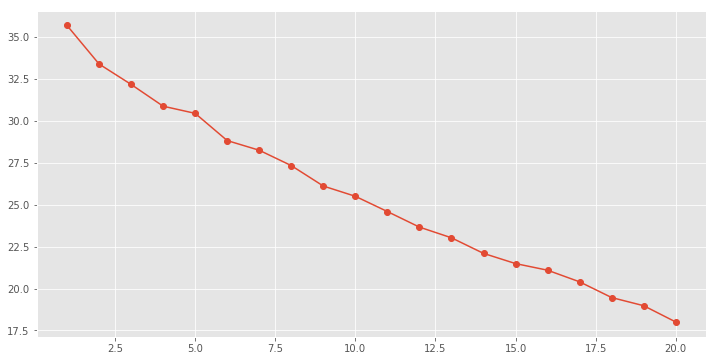

In [86]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Method-2 : Using Silhoutte Coefficients:

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.059077108904078565


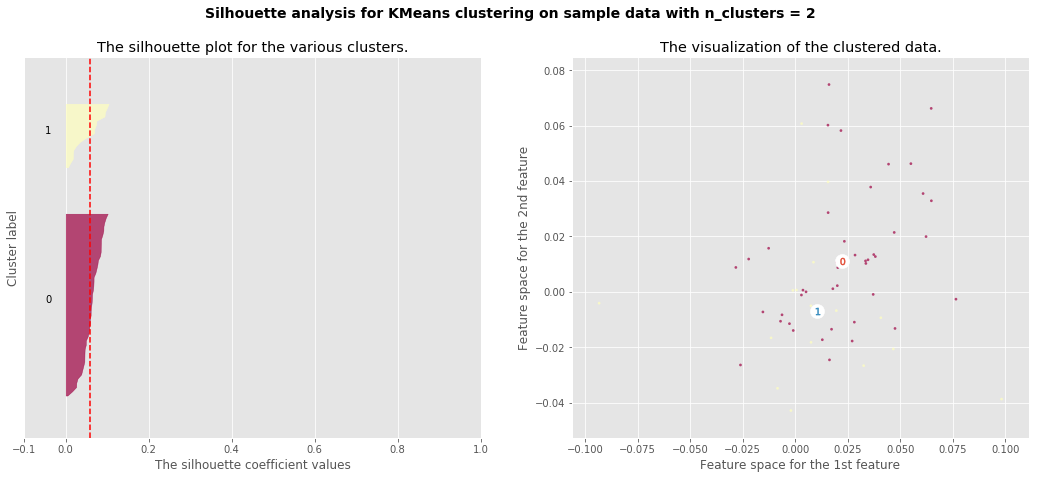

For n_clusters = 3 The average silhouette_score is : 0.029934414984391453


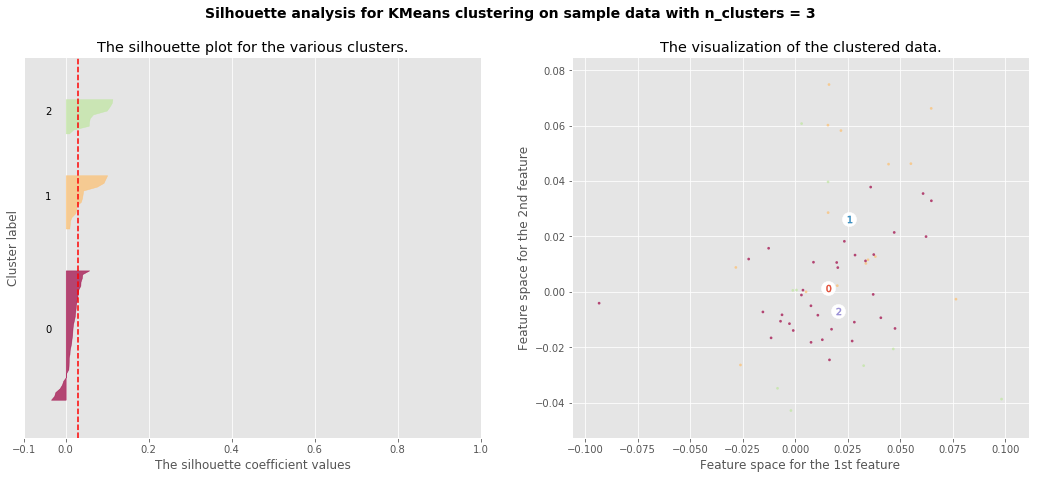

For n_clusters = 4 The average silhouette_score is : 0.019982802787029255


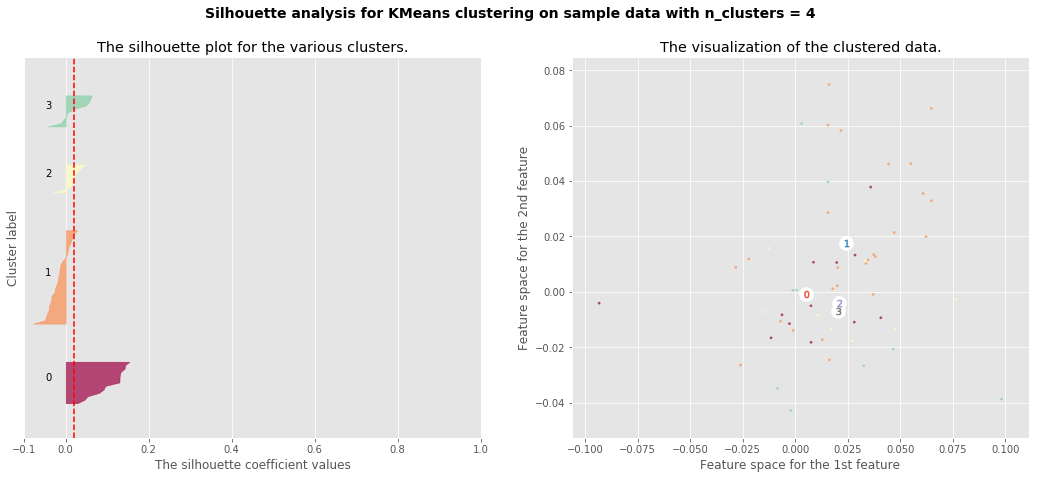

For n_clusters = 5 The average silhouette_score is : 0.02867973596200385


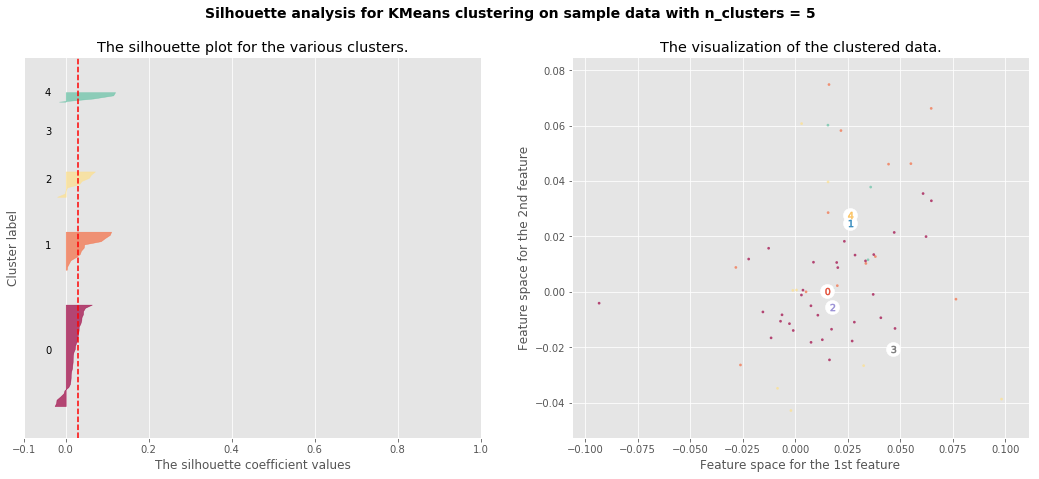

For n_clusters = 6 The average silhouette_score is : 0.028644911171790362


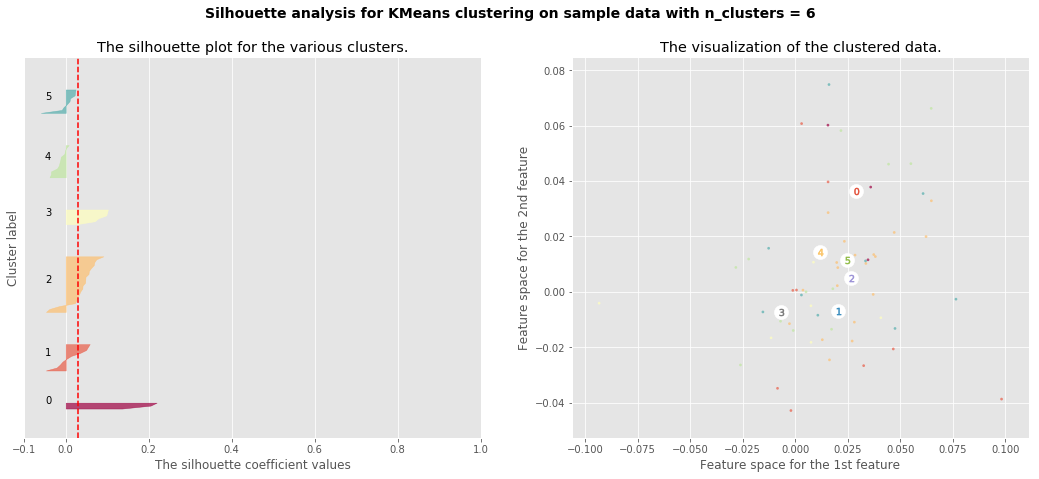

For n_clusters = 7 The average silhouette_score is : 0.03179254580812316


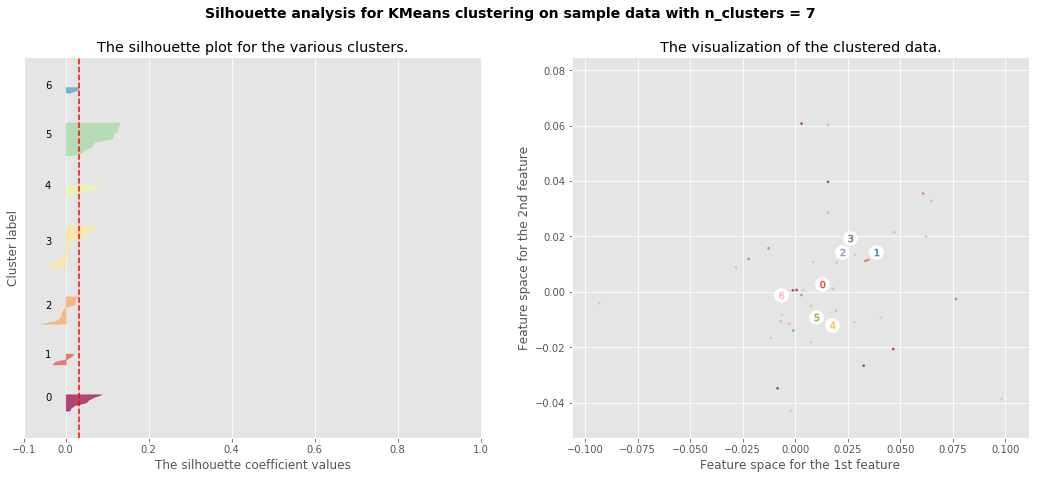

For n_clusters = 8 The average silhouette_score is : 0.03749094515920468


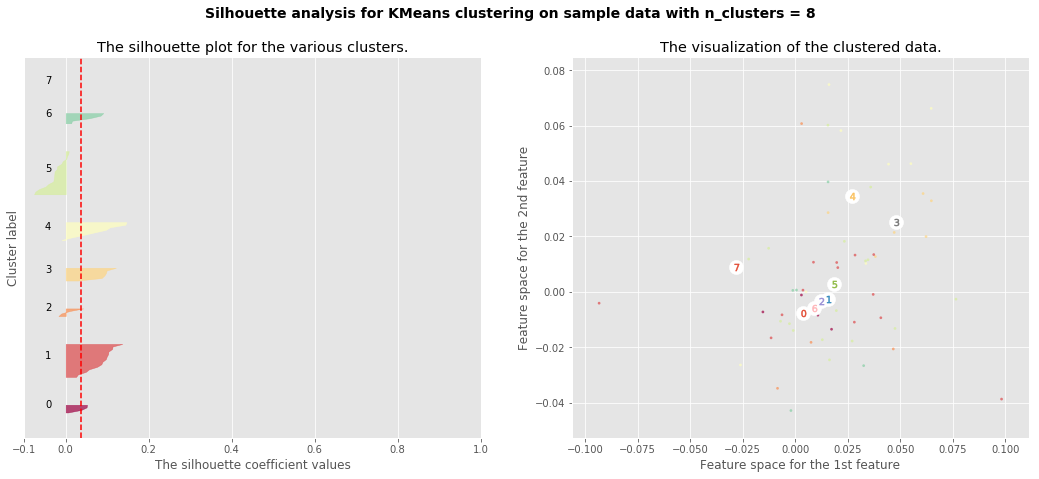

For n_clusters = 9 The average silhouette_score is : 0.033786983053468354


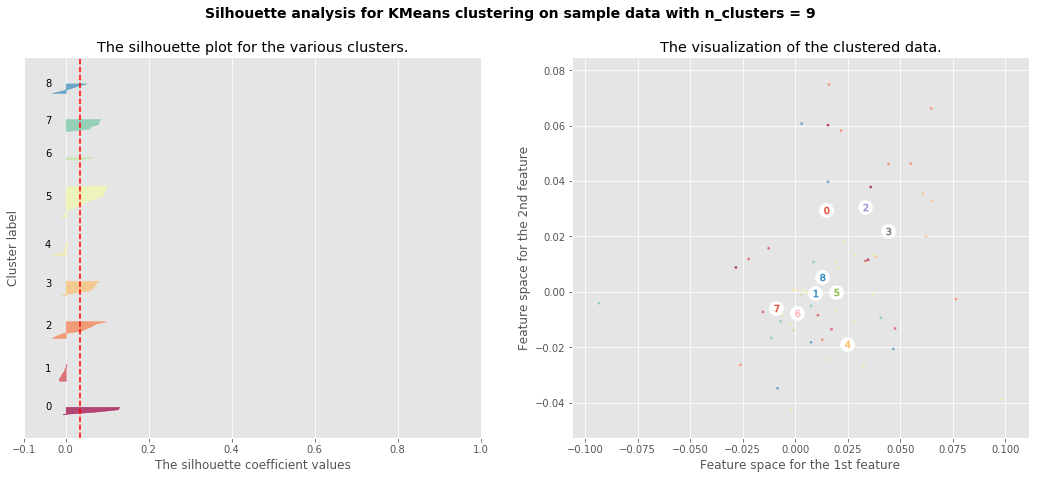

For n_clusters = 10 The average silhouette_score is : 0.0491466064754518


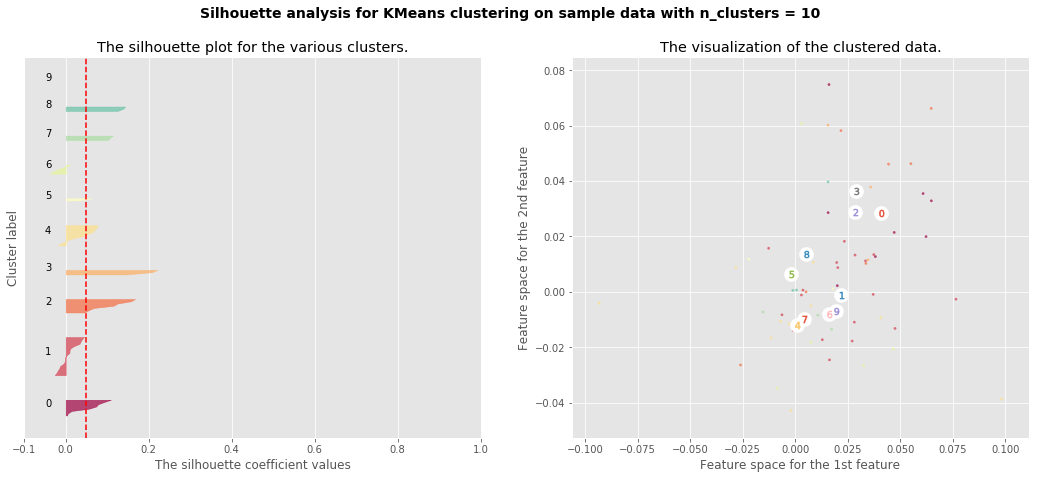

For n_clusters = 11 The average silhouette_score is : 0.045828035905465116


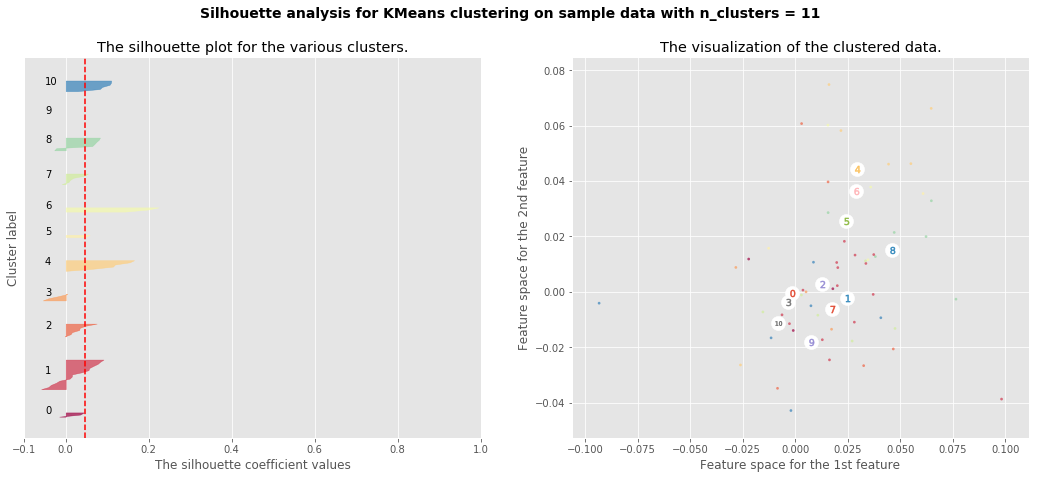

For n_clusters = 12 The average silhouette_score is : 0.04685693771638304


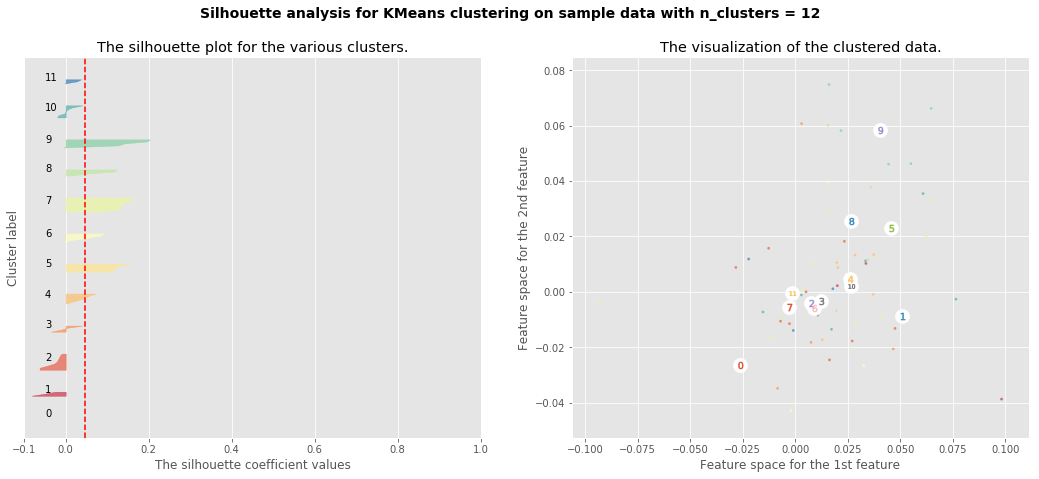

For n_clusters = 13 The average silhouette_score is : 0.0483945270155488


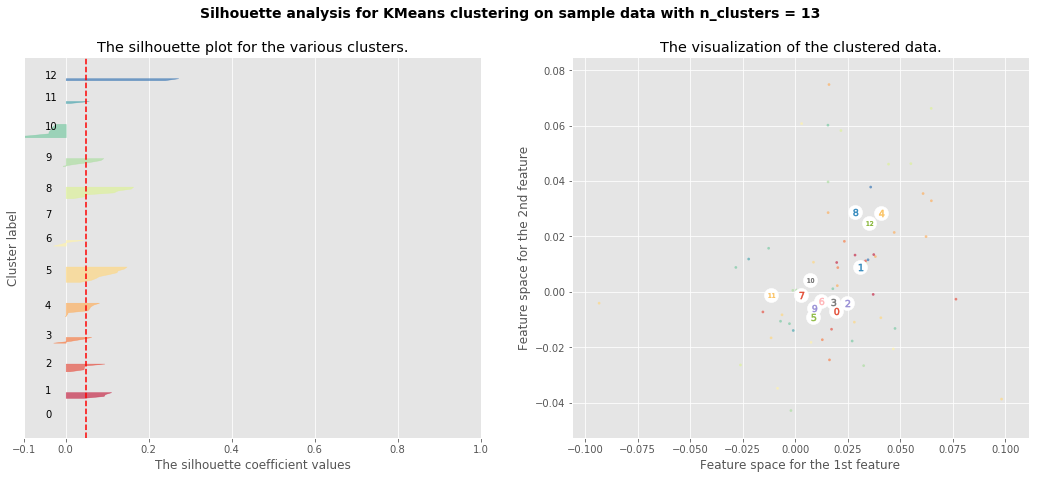

For n_clusters = 14 The average silhouette_score is : 0.05145118343006967


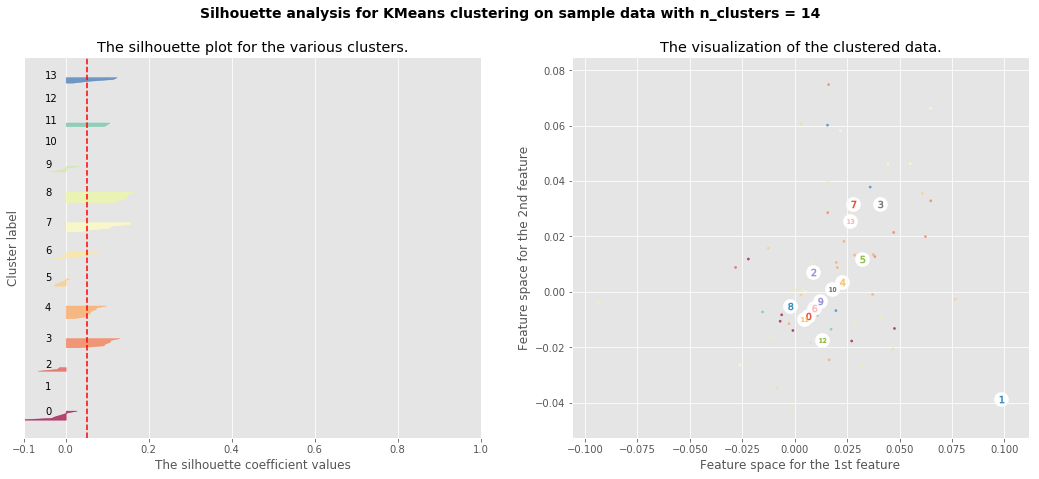

For n_clusters = 15 The average silhouette_score is : 0.05406633592200689


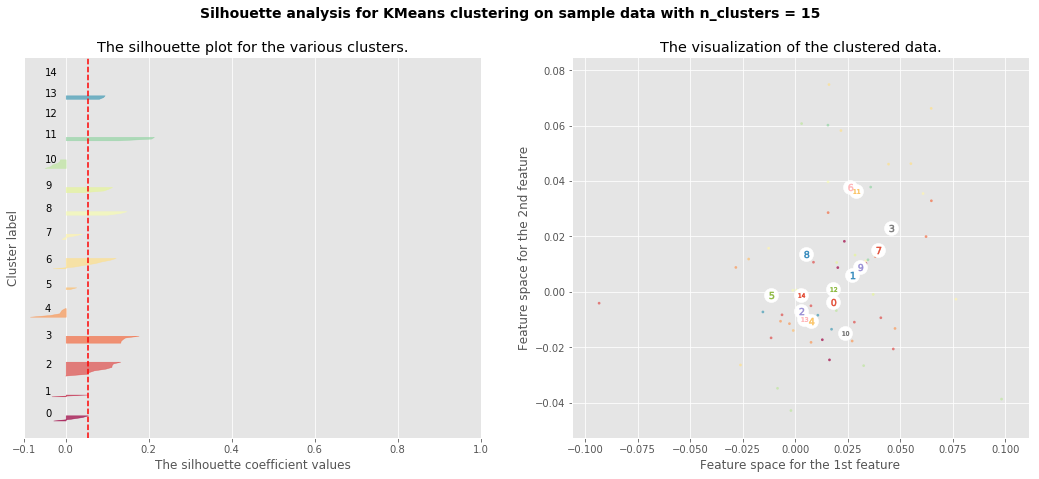

For n_clusters = 16 The average silhouette_score is : 0.04661825671329989


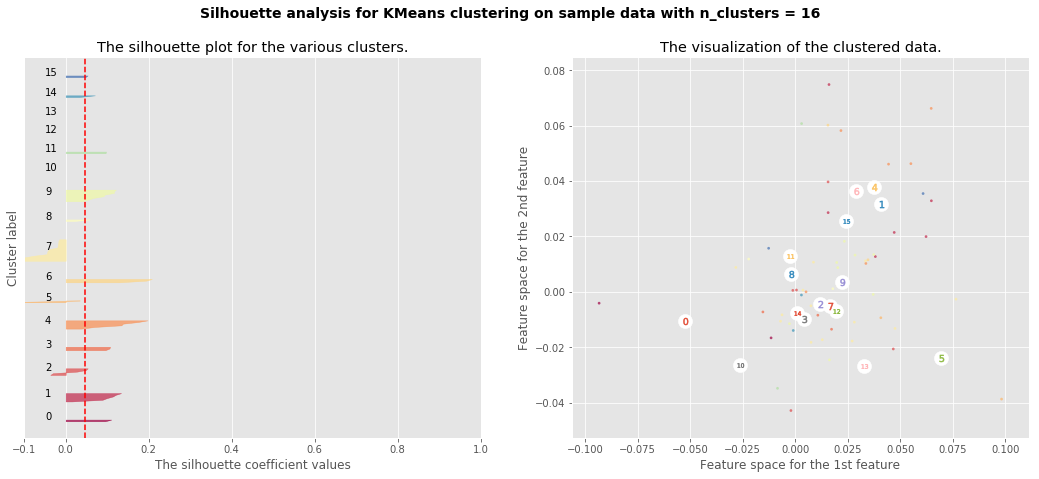

For n_clusters = 17 The average silhouette_score is : 0.04746712652638655


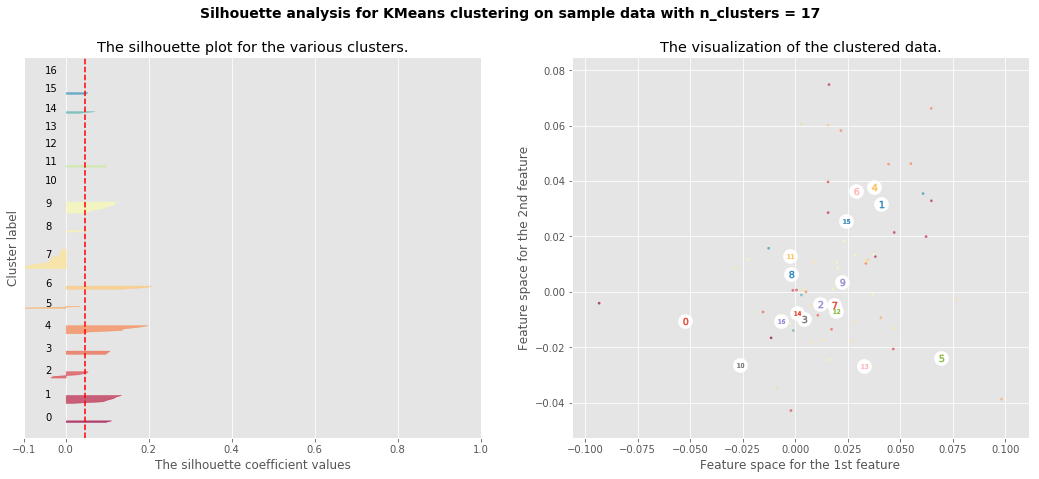

For n_clusters = 18 The average silhouette_score is : 0.05881375752010144


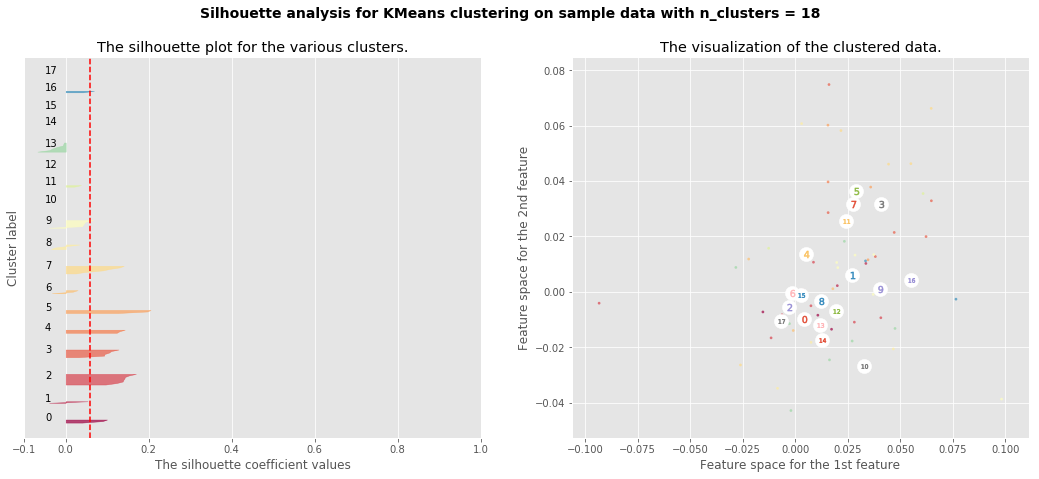

For n_clusters = 19 The average silhouette_score is : 0.04588689091969884


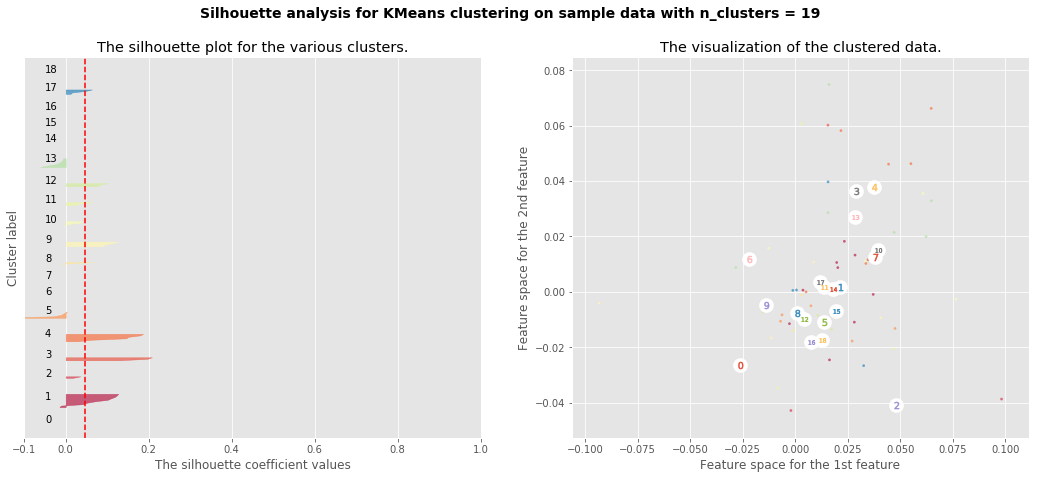

In [80]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = normalized_movements

range_n_clusters = range(2,20)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init = 15,random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### Method -3 : Using Dendograms:

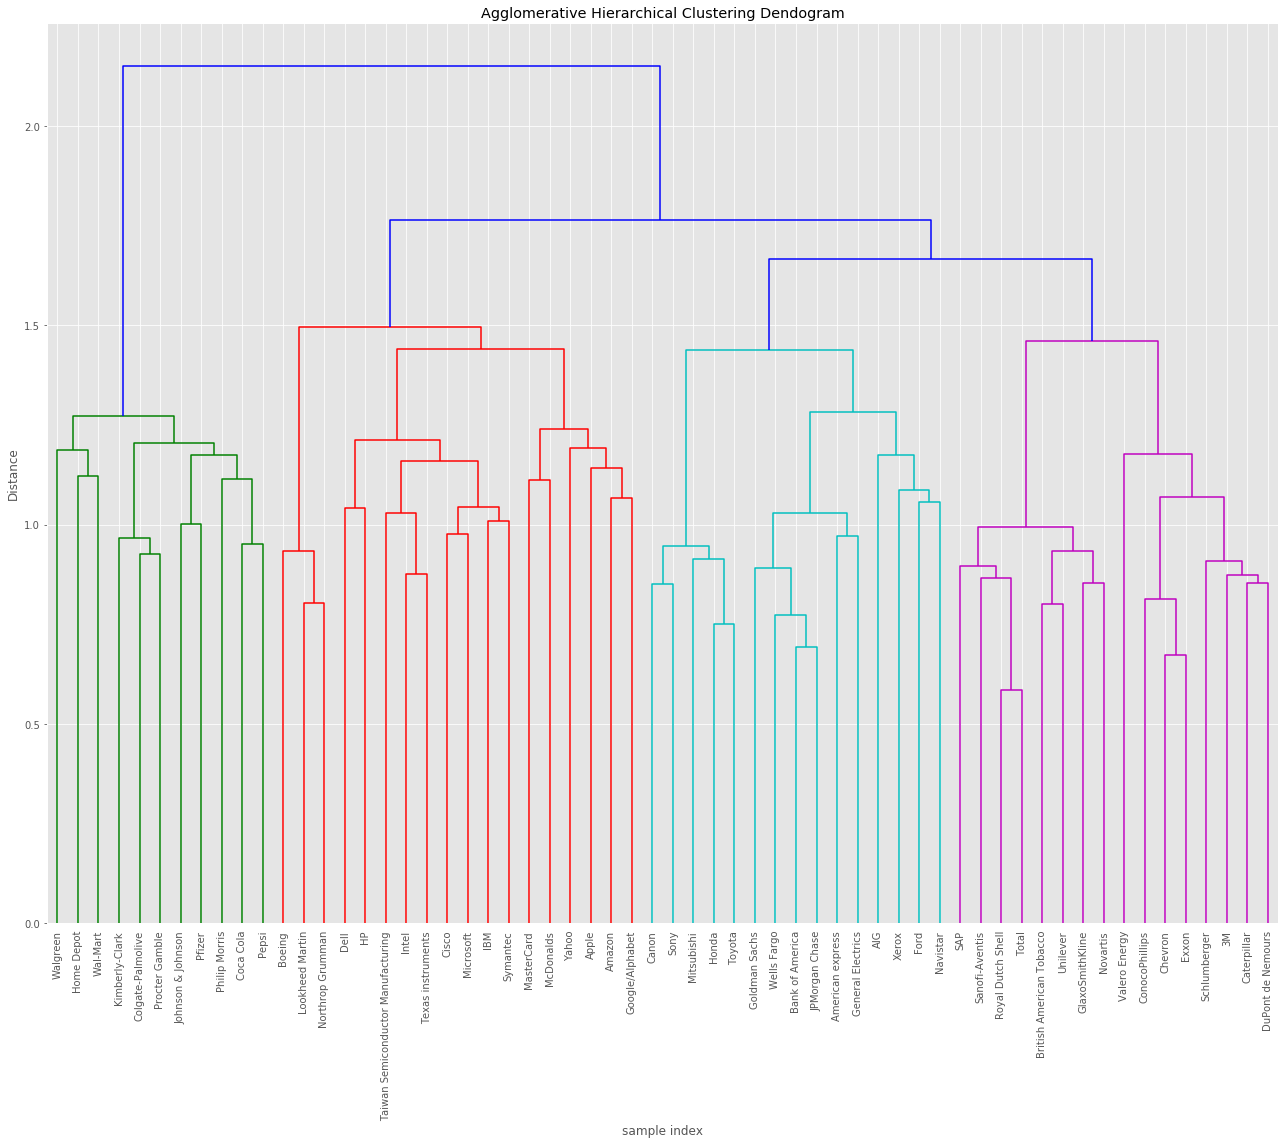

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(normalized_movements, 'ward')
dendrogram(Z,leaf_rotation=90.0,labels=companies.values,leaf_font_size=10)
plt.tight_layout()

In [ ]:
# based on the above methods

In [62]:

kmeans=KMeans(n_clusters=10)
labels=kmeans.fit_predict(normalized_movements)
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
2        0                              Amazon
17       0                     Google/Alphabet
1        1                                 AIG
15       1                                Ford
0        2                               Apple
33       2                           Microsoft
22       2                                  HP
11       2                               Cisco
14       2                                Dell
53       3                       Valero Energy
35       3                            Navistar
32       3                                  3M
58       3                               Xerox
16       3                   General Electrics
59       3                               Yahoo
8        3                         Caterpillar
13       3                   DuPont de Nemours
3        3                    American express
29       4                     Lookheed Martin
36       4                    Northrop Grumman
4        4   

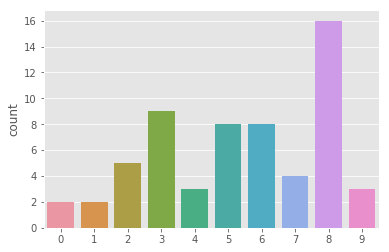

In [69]:
df.groupby('labels')['companies'].count()
sns.countplot(labels,data=df)

### NOTE: 
Since data consists of 964 columns, thus we are not able to get well separated and compact clusters. 

Let's use PCA for dimensionality reduction to get better clusters

In [17]:
# pca = PCA(n_components=2)
# demo=df
# demo = demo.iloc[0:,1:]
# companies = pd.read_csv("company-stock-movements-2010-2015-incl.csv").iloc[0:,0]
# #demo = demo.drop('Unnamed: 0',axis=1)
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# #sc=StandardScaler()
# demo = pd.DataFrame(normalizer.fit_transform(demo))
# #demo = pd.DataFrame(sc.fit_transform(demo))
# #Trying out polynomial features (feature extraction):
# # poly=PolynomialFeatures(degree=2)
# # demo=poly.fit_transform(demo)
# demo = pd.DataFrame(pca.fit_transform(demo))

In [98]:
pca=PCA(n_components=2)
pca_normalized_movements = pca.fit_transform(normalized_movements)

In [99]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 16)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 15,random_state=1)
  clusters.fit(pca_normalized_movements)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,4.720259
1,2,2.586880
2,3,1.205403
3,4,0.787871
4,5,0.566733
5,6,0.460836
6,7,0.359342
7,8,0.293223
8,9,0.245399
9,10,0.200811


In [108]:
errors = clusters_df.cluster_errors
for i in range(len(errors)-1):
    print(errors[i+1]-errors[i])

-2.1333783476669854
-1.3814766977019894
-0.41753239673153675
-0.22113847100905448
-0.1058970055632415
-0.10149407231380664
-0.06611819849183775
-0.047824308165195034
-0.044588026882833115
-0.04274339758322643
-0.021305068803653182
-0.011166906458608572
-0.014264954419565004
-0.004857255233400692


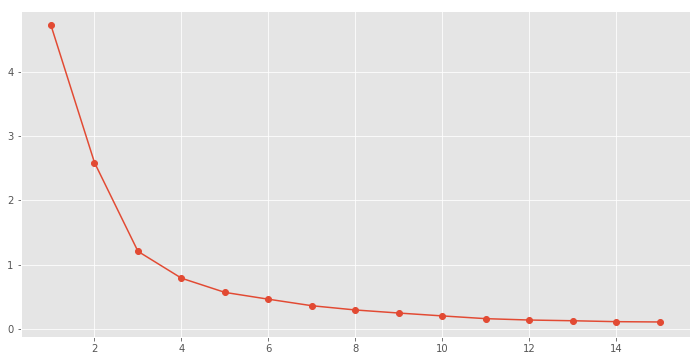

In [101]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# k should be 5 from elbow plot 

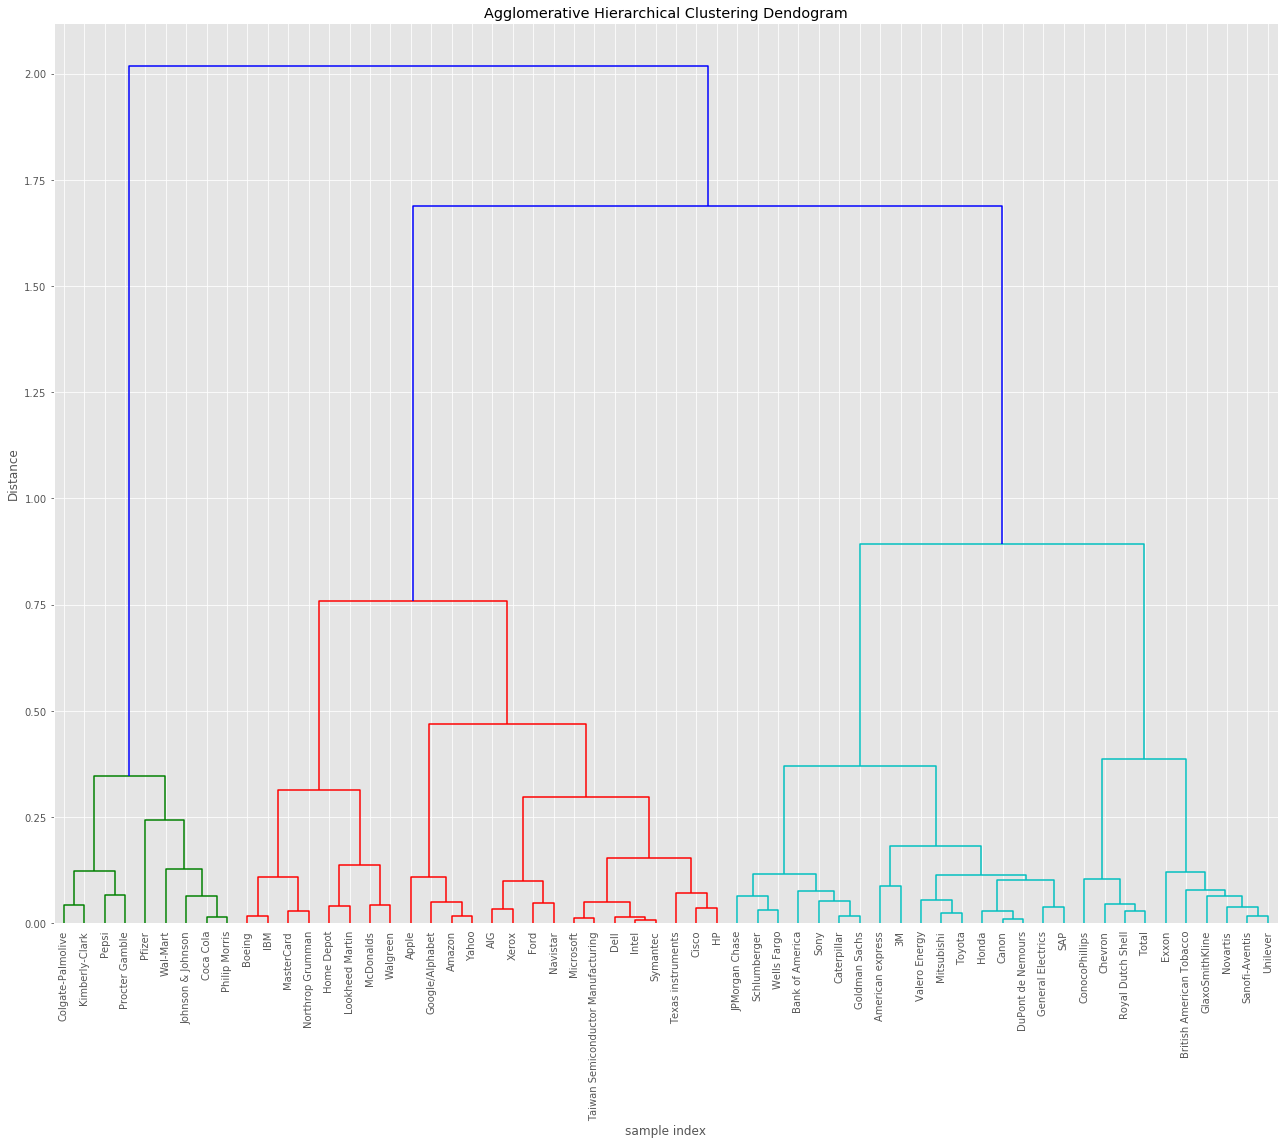

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(pca_normalized_movements, 'ward')
dendrogram(Z,leaf_rotation=90.0,labels=companies.values,leaf_font_size=10)
plt.tight_layout()

In [105]:
# k should be 5 from dendogram

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.486313484857499


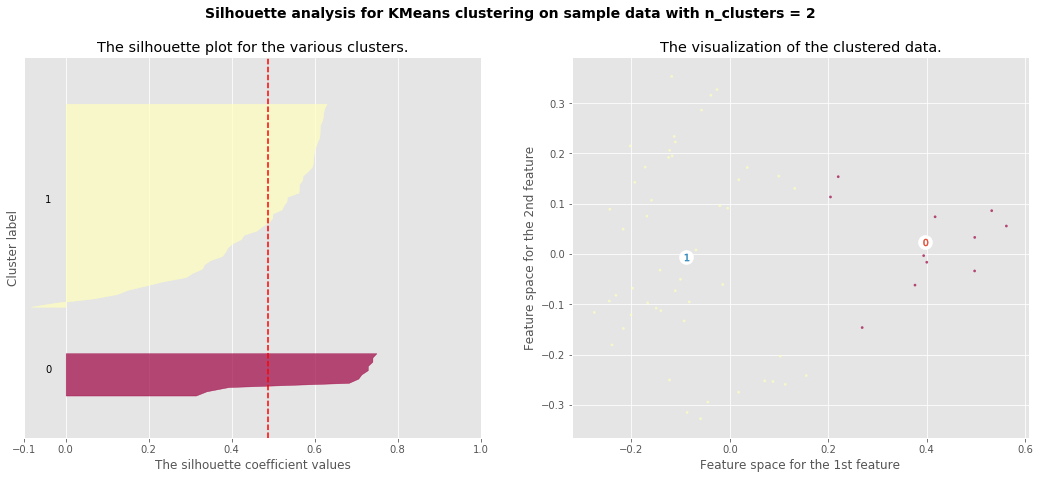

For n_clusters = 3 The average silhouette_score is : 0.49801496411620766


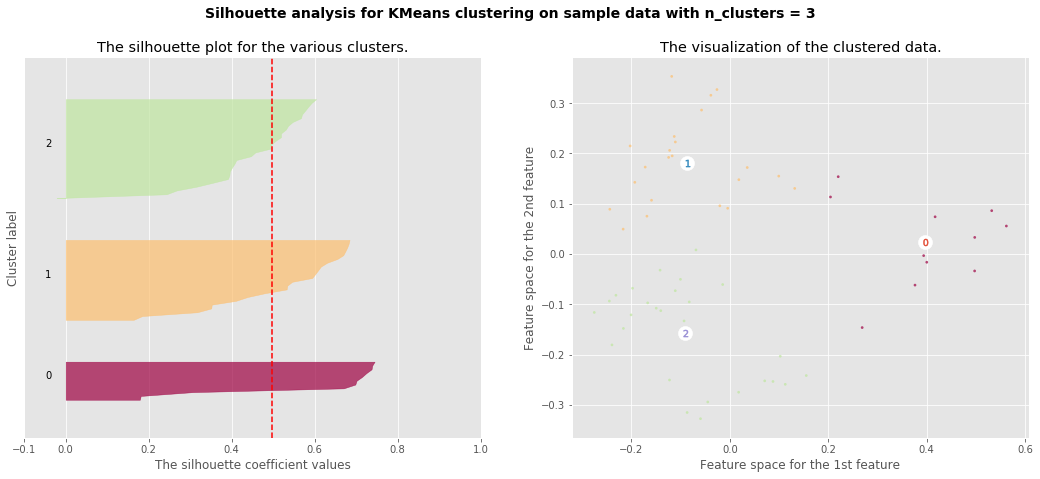

For n_clusters = 4 The average silhouette_score is : 0.49682050975777997


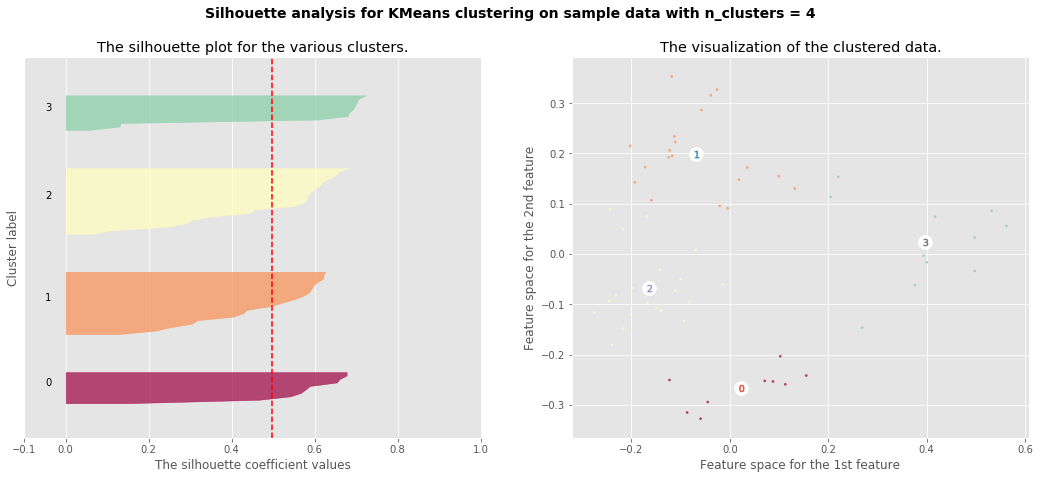

For n_clusters = 5 The average silhouette_score is : 0.5112154322588589


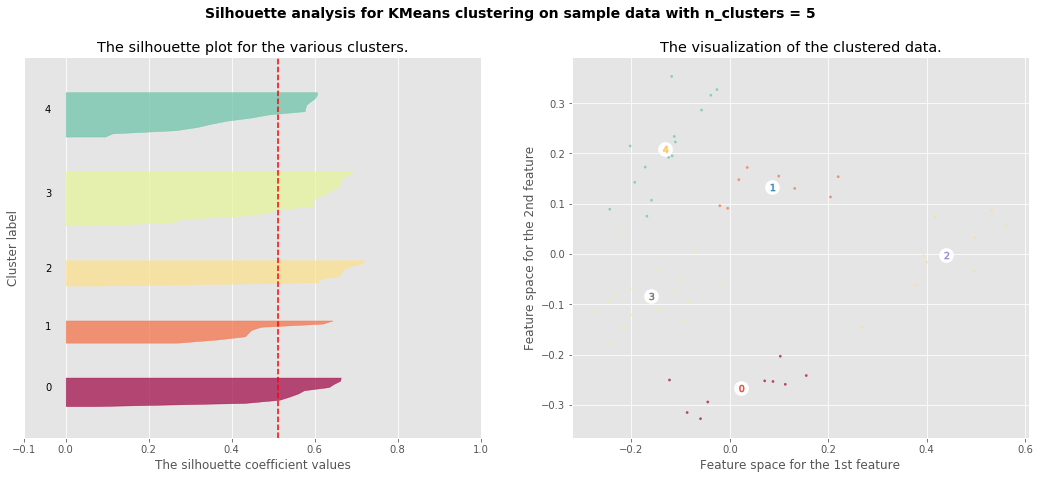

For n_clusters = 6 The average silhouette_score is : 0.4934227267011627


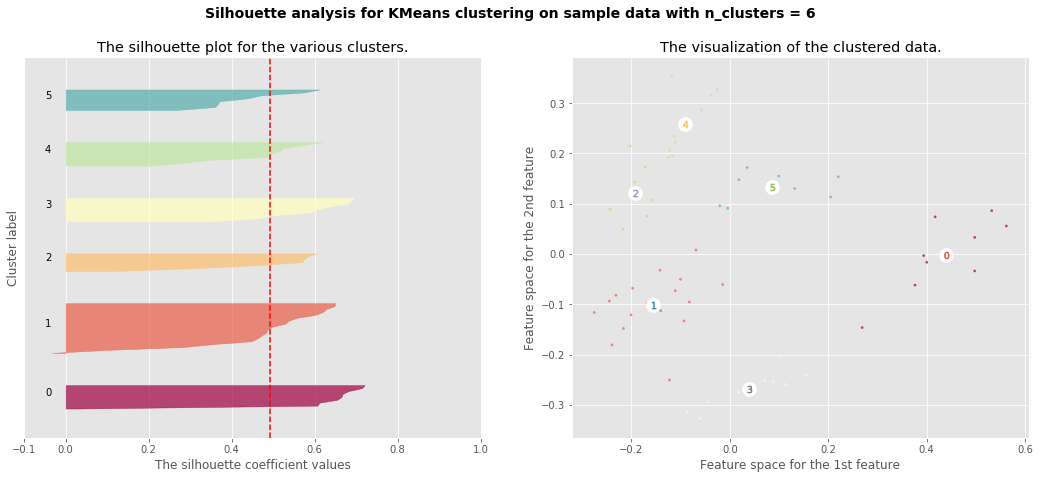

For n_clusters = 7 The average silhouette_score is : 0.49966721787860374


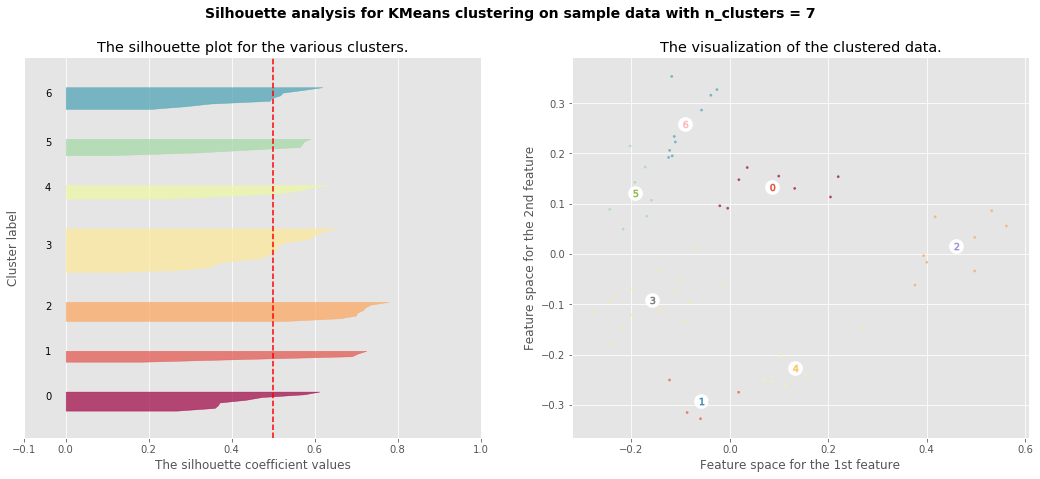

For n_clusters = 8 The average silhouette_score is : 0.47218546760313995


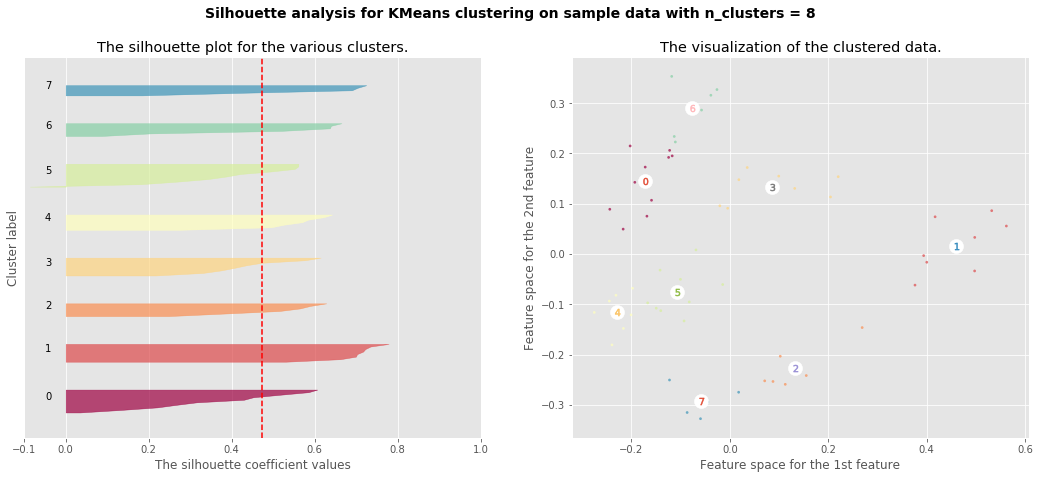

For n_clusters = 9 The average silhouette_score is : 0.4752577717036892


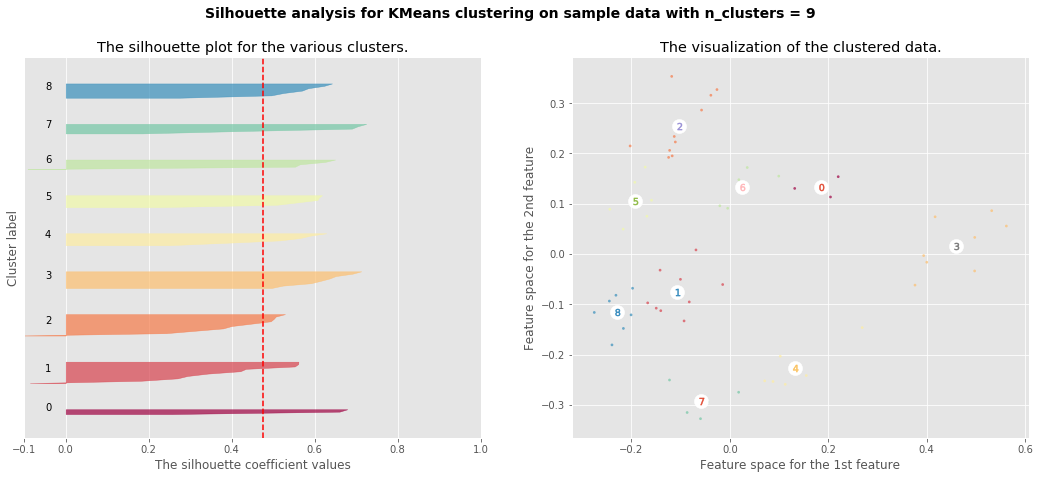

For n_clusters = 10 The average silhouette_score is : 0.5023617492463479


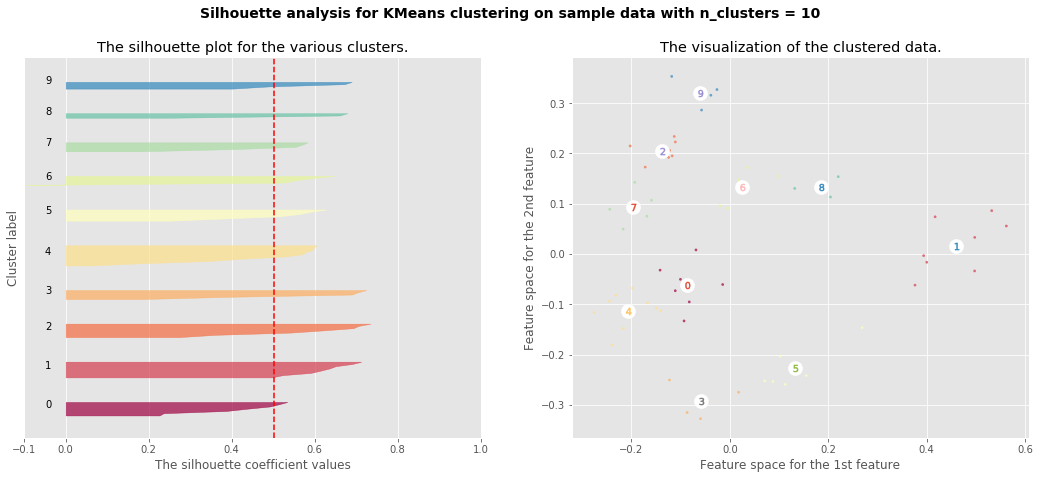

For n_clusters = 11 The average silhouette_score is : 0.4841775069856334


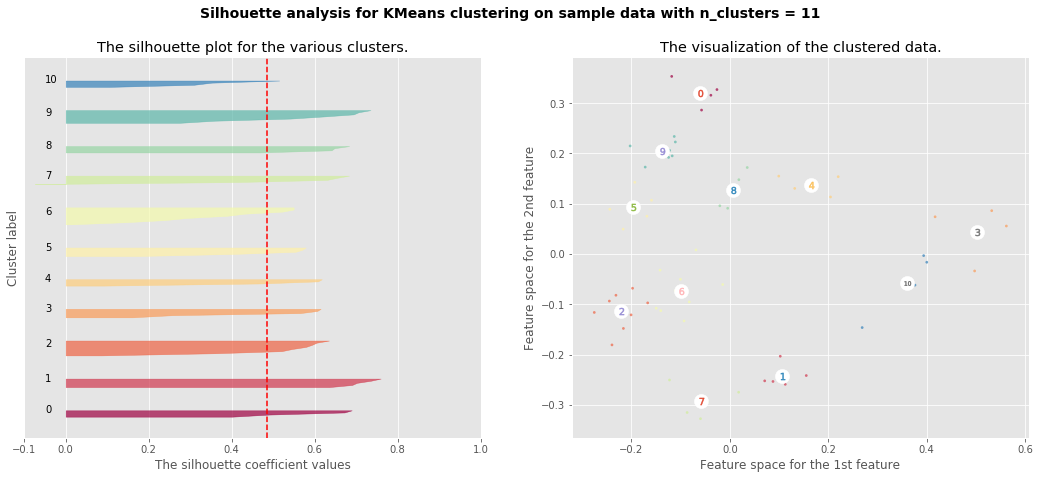

For n_clusters = 12 The average silhouette_score is : 0.48294374007791957


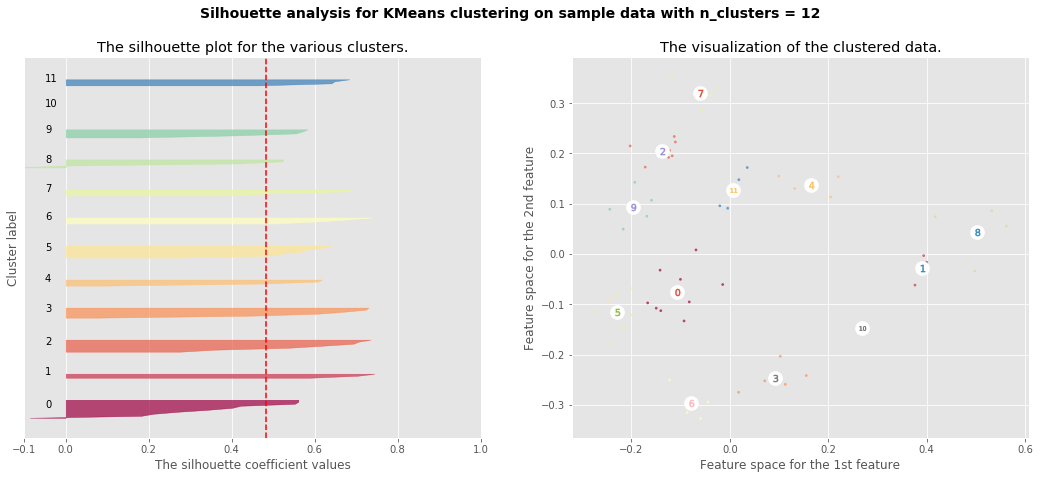

For n_clusters = 13 The average silhouette_score is : 0.4380160389238908


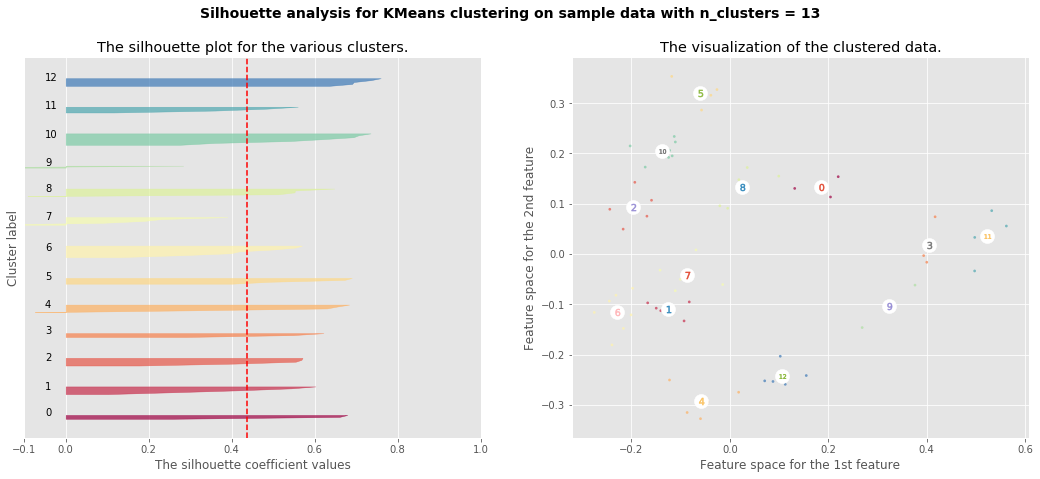

For n_clusters = 14 The average silhouette_score is : 0.4536035389248611


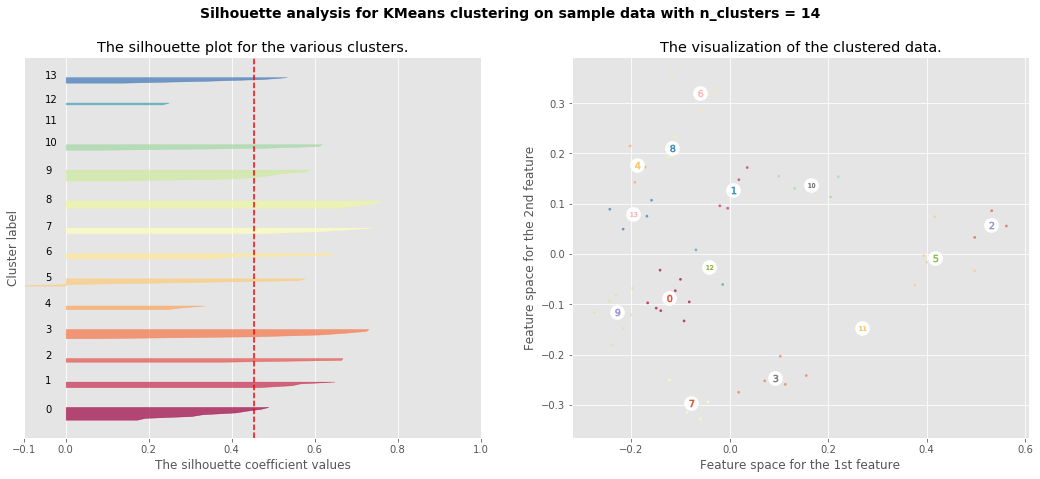

In [104]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = pca_normalized_movements

range_n_clusters = range(2,15)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init = 15,random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [106]:
# k should be 5 from silhoutte coefficient score

In [109]:
kmeans = KMeans(n_clusters=10,n_init = 15,random_state=1)
kmeans = kmeans.fit(pca_normalized_movements)
labels = kmeans.predict(pca_normalized_movements)
centroids = kmeans.cluster_centers_
labeled_df = pd.DataFrame({'labels': labels, 'companies': companies})
# Display df sorted by cluster label
print(labeled_df.sort_values('labels'))

    labels                           companies
53       0                       Valero Energy
3        0                    American express
34       0                          Mitsubishi
48       0                              Toyota
43       0                                 SAP
16       0                   General Electrics
32       0                                  3M
27       1                      Kimberly-Clark
25       1                   Johnson & Johnson
38       1                               Pepsi
40       1                      Procter Gamble
41       1                       Philip Morris
56       1                            Wal-Mart
28       1                           Coca Cola
9        1                   Colgate-Palmolive
11       2                               Cisco
47       2                            Symantec
50       2  Taiwan Semiconductor Manufacturing
51       2                   Texas instruments
24       2                               Intel
33       2   

#### Clustering has improved after PCA!
- FMCG companies like form a separate cluster
- Financial Companies like Goldman sachs, bank of america, JP Morgan Chase form another cluster
- IT hardware/software companies like Dell, Microsoft, intel,Cisco, symantec form one cluster
- Technology companies like Google, Yahoo, Apple and amazon form a separate cluster
- Pharmaceutical companies like pfizer, GlaxoSmithKline, Novartis form a cluster
- Energy based corporations like ConocoPhillips, Royal Dutch Shell, Total, Chevron make a separate cluster with some mismatches
